<a href="https://colab.research.google.com/github/SilverSurferClash/Binary_classification/blob/main/Import_clean_SFDC_script_Jan_15th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [211]:
#!pip freeze > requirements.txt

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
#plt.style.use('dark_background')
import seaborn as sns
import os
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 2)
#Use option to round floats to two decimals
#pd.set_option('display.float_format',  '{:,.2f}'.format)
# Use option to display $ dollars
#pd.set_option('display.float_format', '${:.2f}'.format)
sns.set_style("ticks")
# Plotting pretty figures and avoid blurry images
#%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
#sns.set_context('notebook')


# Enable multiple cell outputs
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')              


In [213]:
os.getcwd()

'/content/drive/My Drive/Colab_Notebooks/January_2023/Data'

In [214]:
os.chdir("/content/drive/MyDrive/Colab_Notebooks/January_2023/Data")

#### Helper function

In [215]:
#Create a function that use the second element if the list has a length of 2 other return unknown

def clean_up_account(list_of_names):

  if len(list_of_names) == 2:
    return list_of_names[1]
  else:
    return list_of_names[0]





In [216]:
#Create a function to clean up the Billing type feature


Import helper data

In [217]:
#Import lookup table for countries
lookup_countries = pd.read_excel("./lookup.xlsx", sheet_name = 0)
#Import the data from SFDC as a excel file
#import_sfdc = pd.read_excel("./Prospective.xlsx", sheet_name = 0, 
                            #skiprows = 10)

import_sfdc = dec_sfdc = pd.read_excel("./Dec_22_sfdc.xlsx", sheet_name = 0, skiprows = 13)
#Create dictionairy for maping the lookup value
country_dict = dict(zip(lookup_countries["Reporting_Country_short"], lookup_countries["Account_Reporting_Country"]))
#Import lookup table for countries
lookup_type = pd.read_excel("./lookup.xlsx", sheet_name = "Type")
#Create dictionairy for maping the lookup values for LIMS ID
type_dict = dict(zip(lookup_type["LIMS Project ID"], lookup_type["Type"]))
#Dictionaire for AE support countries 
AE_dict = { 'CANADA': "AE", "SPAIN" : "AE", "UNITED KINGDOM" : "AE", "BRAZIL" : "AE", "TURKEY" : "AE", "IRELAND" : "AE"}
#Import lookup Cancer Type
lookup_cancer_type = pd.read_excel("./lookup.xlsx", sheet_name = "Cancer_type")
cancer_type_dict = dict(zip(lookup_cancer_type["Old"], lookup_cancer_type["New"]))
#Map the countries to the sub-regions
subregion_dict = dict(zip(lookup_countries["Account_Reporting_Country"], lookup_countries["Sub_region"]))
#Import the currency data
lookup_currency = pd.read_excel("./lookup.xlsx", sheet_name = "Currency", parse_dates= ["Month"]).set_index("Month")
lookup_currency["EUR"] = lookup_currency["EUR"]/1000000
lookup_currency["GBP"] = lookup_currency["GBP"]/1000000
lookup_currency["USD"] = 1

#Import the currency type
lookup_currency_type =  pd.read_excel("./lookup.xlsx", sheet_name = "curr_look")
#Inport lookun Billing_type - Needs further work
#lookup_billing_type = pd.read_excel("./lookup.xlsx", sheet_name = "Billing_type")
#billing_type_dict = dict(zip(lookup_billing_type["Billing Type"], lookup_billing_type["Billing Type.1"]))


In [218]:
import_sfdc.head()

,Unnamed: 0,Accession #,Unnamed: 2,Reporting Country,Test Ordered,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Date Received,Final Report Date,Test Type,Cancer Type
0,NaN,A0646458,NaN,GB,Guardant 360,Self-Pay Patient,GHI_19,Guys Hospital,Harris Gousis,1/13/2023,NaN,Guardant360 CDx EU,Lung adenocarcinoma
1,NaN,A0646060,NaN,FR,Guardant 360,Pharma : US,AZN_33,AZN_33: Institut Gustave Roussy,Benjamin Besse,1/13/2023,NaN,Guardant 360,Non-small cell lung carcinoma (NSCLC)
2,NaN,A0646322,NaN,CA,Guardant 360,Distributors : ROW,GHI_01,"Blueguide, Inc.",Kate Barrett,1/13/2023,NaN,Guardant 360,Pending
3,NaN,A0645848,NaN,CA,LUNAR1_Other,Pharma : US,NRG_01,NRG_01: Royal Victoria Regional Health Centre,Robert El-Maraghi,1/13/2023,NaN,LUNAR1_CRC,Colorectal adenocarcinoma
4,NaN,A0645837,NaN,CA,LUNAR1_Other,Pharma : US,NRG_01,NRG_01: Royal Victoria Regional Health Centre,Robert El-Maraghi,1/13/2023,NaN,LUNAR1_CRC,Colorectal adenocarcinoma


In [219]:
import_sfdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11373 entries, 0 to 11372
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             0 non-null      float64
 1   Accession #            11371 non-null  object 
 2   Unnamed: 2             1 non-null      object 
 3   Reporting Country      11369 non-null  object 
 4   Test Ordered           11368 non-null  object 
 5   Billing Type           11367 non-null  object 
 6   LIMS Project ID        11368 non-null  object 
 7   Account: Account Name  11368 non-null  object 
 8   Contact: Full Name     11368 non-null  object 
 9   Date Received          11368 non-null  object 
 10  Final Report Date      10498 non-null  object 
 11  Test Type              11368 non-null  object 
 12  Cancer Type            11295 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [220]:
### Identify the unique LIMS IDs

In [221]:
a = list(set(import_sfdc["LIMS Project ID"]))

In [222]:
b = set(type_dict.keys())

In [223]:
b

{'AMG_01',
 'ARI_01',
 'ATLS_01',
 'ATLS_02',
 'AZN_16',
 'AZN_33',
 'AZN_96',
 'AZN_test_96',
 'BLU_04',
 'BMS_23',
 'BSL_01',
 'CUB_01',
 'GAP',
 'GAP_02',
 'GAP_03',
 'GAP_05',
 'GAP_06',
 'GAP_08',
 'GAP_10',
 'GAP_12',
 'GH2_12',
 'GHI_01',
 'GHI_01_COV',
 'GHI_03',
 'GHI_05',
 'GHI_10',
 'GHI_19',
 'GRY_01',
 'IMC_SOW05',
 'IST - Americas',
 'JNJ_12',
 'JNJ_18',
 'JNJ_18_IUO',
 'JNJ_19',
 'JNJ_20',
 'JNJ_32_EU',
 'JNS_09',
 'KGA_17',
 'KGA_27_G360',
 'MAL_01',
 'MIR_01',
 'MRK_23',
 'NILE_01',
 'NOU_01',
 'NOU_02',
 'NRG_01',
 'OCT_1P',
 'ORACLE',
 'ORN_02',
 'PCE_01',
 'PFE_14',
 'PGS_01',
 'PMT_01',
 'PRG_01',
 'PRN_1C',
 'RHI_E1',
 'SCRI_CUP',
 'SCRI_NSCLC',
 'SER_02',
 'SGE_04',
 'SGE_05',
 'SLLIP_01',
 'SOL_01',
 'SPA_UT',
 'SRA_01',
 'TAS_01',
 'TRCC_01',
 'TRCC_02_retro',
 'UHF_01',
 'VAL_01',
 'VIS_01',
 'VLT_01'}

In [224]:
list(set(a)-set(b))

['TRM_01', nan, 'GHI_18']

In [225]:
curr_dict = dict(zip(lookup_currency_type["Account_Reporting_Country"], lookup_currency_type["Currency"]))

#curr_dict

In [226]:

print(f"the currency rate is {lookup_currency.iloc[1,0]}")
#lookup_currency.head(3)

the currency rate is 1.123847


In [227]:
#Identify which LIMS id are not in the lookup
unique_LIMS_id = list(set(import_sfdc["LIMS Project ID"]))
unique_lookup_id = list(set(lookup_type["LIMS Project ID"]))
list(set(unique_LIMS_id) - set(unique_lookup_id ))

['TRM_01', nan, 'GHI_18']

In [228]:
import_sfdc.head()

,Unnamed: 0,Accession #,Unnamed: 2,Reporting Country,Test Ordered,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Date Received,Final Report Date,Test Type,Cancer Type
0,NaN,A0646458,NaN,GB,Guardant 360,Self-Pay Patient,GHI_19,Guys Hospital,Harris Gousis,1/13/2023,NaN,Guardant360 CDx EU,Lung adenocarcinoma
1,NaN,A0646060,NaN,FR,Guardant 360,Pharma : US,AZN_33,AZN_33: Institut Gustave Roussy,Benjamin Besse,1/13/2023,NaN,Guardant 360,Non-small cell lung carcinoma (NSCLC)
2,NaN,A0646322,NaN,CA,Guardant 360,Distributors : ROW,GHI_01,"Blueguide, Inc.",Kate Barrett,1/13/2023,NaN,Guardant 360,Pending
3,NaN,A0645848,NaN,CA,LUNAR1_Other,Pharma : US,NRG_01,NRG_01: Royal Victoria Regional Health Centre,Robert El-Maraghi,1/13/2023,NaN,LUNAR1_CRC,Colorectal adenocarcinoma
4,NaN,A0645837,NaN,CA,LUNAR1_Other,Pharma : US,NRG_01,NRG_01: Royal Victoria Regional Health Centre,Robert El-Maraghi,1/13/2023,NaN,LUNAR1_CRC,Colorectal adenocarcinoma


In [229]:
country_dict

{'CA': 'CANADA',
 'ES': 'SPAIN',
 'IT': 'ITALY',
 'UY': 'URUGUAY',
 'BR': 'BRAZIL',
 'AR': 'ARGENTINA',
 'HU': 'HUNGARY',
 'GB': 'UNITED KINGDOM',
 'MX': 'MEXICO',
 'BE': 'BELGIUM',
 'TR': 'TURKEY',
 'CO': 'COLOMBIA',
 'PE': 'PERU',
 'FR': 'FRANCE',
 'DE': 'GERMANY',
 'PT': 'PORTUGAL',
 'CH': 'SWITZERLAND',
 'CR': 'COSTA RICA',
 'CL': 'CHILE',
 'SE': 'SWEDEN',
 'NL': 'NETHERLANDS',
 'DK': 'DENMARK',
 'IE': 'IRELAND',
 'GR': 'GREECE',
 'AT': 'AUSTRIA',
 'CZ': 'CZECH REPUBLIC',
 'HR': 'CROATIA',
 'UA': 'UKRAINE',
 'SI': 'SLOVENIA',
 'RU': 'RUSSIA',
 'BY': 'BELARUS',
 'FI': 'FINLAND',
 'PR': 'PUERTO RICO',
 'LT': 'LITHUANIA',
 'MK': 'NORTH MACEDONIA',
 'RO': 'ROMANIA',
 'LU': 'LUXEMBOURG',
 'PL': 'POLAND'}

In [230]:
#cancer_type_dict 

#### Import and clean up the data from SFDC

In [231]:
import_sfdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11373 entries, 0 to 11372
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             0 non-null      float64
 1   Accession #            11371 non-null  object 
 2   Unnamed: 2             1 non-null      object 
 3   Reporting Country      11369 non-null  object 
 4   Test Ordered           11368 non-null  object 
 5   Billing Type           11367 non-null  object 
 6   LIMS Project ID        11368 non-null  object 
 7   Account: Account Name  11368 non-null  object 
 8   Contact: Full Name     11368 non-null  object 
 9   Date Received          11368 non-null  object 
 10  Final Report Date      10498 non-null  object 
 11  Test Type              11368 non-null  object 
 12  Cancer Type            11295 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [232]:
#Remove the first two columns
import_sfdc = import_sfdc.drop(["Unnamed: 0", "Unnamed: 2"], axis = 1)
#Drop the last five rows
import_sfdc = import_sfdc.iloc[0:-5]
#Cast Date Received to datetime object 
#import_sfdc["Date Received"] = pd.to_datetime(import_sfdc["Date Received"])
#Clean up the type column



import_sfdc["Type"] = import_sfdc["LIMS Project ID"].map(type_dict)



#Replace the two letter country code with the full country name
import_sfdc["Reporting Country"] = import_sfdc["Reporting Country"].map(country_dict)
#Clean up the cancer types and reduce number of categories
import_sfdc["Cancer Type"] = import_sfdc["Cancer Type"].map(cancer_type_dict)
#Clean up the Account column by removing all strings before the ":"
import_sfdc["Account: Account Name"] = import_sfdc.loc[:, "Account: Account Name"].str.split(":").apply(clean_up_account)

#Clean up the Billing type column 
#import_sfdc["Billing Type"] = import_sfdc["Billing Type"].map(billing_type_dict)
#import_sfdc.tail(6)

# Set the date recieved as date index
#import_sfdc = import_sfdc.set_index("Date Received")

import_sfdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11368 entries, 0 to 11367
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Accession #            11368 non-null  object
 1   Reporting Country      11368 non-null  object
 2   Test Ordered           11368 non-null  object
 3   Billing Type           11367 non-null  object
 4   LIMS Project ID        11368 non-null  object
 5   Account: Account Name  11368 non-null  object
 6   Contact: Full Name     11368 non-null  object
 7   Date Received          11368 non-null  object
 8   Final Report Date      10498 non-null  object
 9   Test Type              11368 non-null  object
 10  Cancer Type            4711 non-null   object
 11  Type                   11355 non-null  object
dtypes: object(12)
memory usage: 1.0+ MB


In [233]:
#df[“column_name”] = np.where(df[“column_name”]==”some_value”, value_if_true, value_if_false)
import_sfdc["AE_supported"] = np.where(import_sfdc["Reporting Country"].isin(AE_dict.keys()), "AE", "non_AE")

#Add a column with the information about the currency based on the imported dictionairy
import_sfdc["Currency"] = import_sfdc["Reporting Country"].map(curr_dict)


In [234]:
import_sfdc["Sub_region"] = import_sfdc["Reporting Country"]
import_sfdc["Sub_region"] = import_sfdc["Sub_region"].map(subregion_dict)

In [235]:
import_sfdc["Date Received"] = pd.to_datetime(import_sfdc["Date Received"])
import_sfdc = import_sfdc.set_index("Date Received")

In [236]:
#Create date and time features

#Create a year, month, quarter variable
import_sfdc["Month"] = import_sfdc.index.month
import_sfdc["Year"] = import_sfdc.index.year
import_sfdc['Quarter'] = import_sfdc.index.quarter
#Other feature engineering based on feature analysis below
import_sfdc['Sales'] = 1

#create a Year Month columns
import_sfdc['Year_Month'] = import_sfdc.index.to_period('M')
#Cast the Year_Month column to a str
import_sfdc['Year_Month'] = import_sfdc['Year_Month'].astype(str)
import_sfdc['Year_Month'] = pd.to_datetime(import_sfdc['Year_Month'])
#Cast some features to categorical
#df['Reporting_Country'] = df['Reporting_Country'].astype('category')
import_sfdc["Type"] = import_sfdc['Type'].astype('category')
#Add a column to allow merging this datafarme with the currency_lookup
#import_sfdc["Month_to_match"] = f"{import_sfdc[["Year"]]}_{import_sfdc[["Month"]]}"
import_sfdc["Month_to_match"] = import_sfdc["Year"].astype("string") + "-" + import_sfdc["Month"].astype("string")

In [237]:
import_sfdc.index.min(),import_sfdc.index.max()

(Timestamp('2019-08-23 00:00:00'), Timestamp('2023-01-13 00:00:00'))

In [238]:
import_sfdc["Reporting Country"].value_counts()

SPAIN              3377
UNITED KINGDOM     2718
FRANCE             1188
ITALY               790
TURKEY              769
CANADA              566
GERMANY             449
BRAZIL              444
POLAND              185
BELGIUM             120
MEXICO              111
HUNGARY             106
IRELAND              89
AUSTRIA              71
SWITZERLAND          64
CHILE                56
FINLAND              56
BELARUS              42
UKRAINE              35
ARGENTINA            34
PORTUGAL             28
GREECE               23
LITHUANIA            11
NETHERLANDS          10
SLOVENIA              7
ROMANIA               5
CZECH REPUBLIC        4
COLOMBIA              4
NORTH MACEDONIA       2
PERU                  2
COSTA RICA            1
LUXEMBOURG            1
Name: Reporting Country, dtype: int64

In [239]:
import_sfdc.Type.value_counts()

Biopharma                  4293
Commercial                 3854
GAP                        1321
Lunar                      1319
GH Trials (Prospective)     568
Name: Type, dtype: int64

In [240]:
import_sfdc[import_sfdc["LIMS Project ID"] == "PCE_01"].groupby("Year")["Sales"].sum()

Year
2021     2
2022    37
2023     1
Name: Sales, dtype: int64

In [241]:
#import_sfdc.info()

In [242]:
#import_sfdc["Billing Type"].value_counts()

In [243]:
#import_sfdc["Test Type"].value_counts()

In [244]:
#import_sfdc["Cancer Type"].value_counts()

In [245]:
#import_sfdc['Billing Type'].value_counts()

In [246]:
# Import the revenue data

revenue_import = pd.read_excel("./Sales_Volume_EUAA_Analytics_December_22.xlsx", skiprows = 28)
revenue_import = revenue_import.iloc[:, 1:12]
#revenue_import.columns.tolist()
revenue_import['Accession #']= revenue_import['Accession #'].fillna("missing") 
revenue_import = revenue_import[revenue_import['Accession #'].str.startswith("A0")]
#revenue_import.info()

In [247]:
revenue_import.head()


,Account: Reporting Country ↑,Date Received,Accession #,Account: Account Name,Contact: Full Name,Billing Type,Final Report Date,Invoiced Ammount,Expected Amount $,Invoiced/In Prg.,FOC
0,BR,9/30/2019,A0198807,Rede D'Or Hospital,Maria Ignez Braghiroli,Self-Pay Patient,10/6/2019,0.0,0.0,NaN,x
1,NaN,9/18/2019,A0196311,Rede D'Or Hospital,Milena Mak,Self-Pay Patient,9/26/2019,0.0,0.0,NaN,x
3,CA,9/17/2019,A0196102,Medicor Cancer Centres,Akbar Khan,Self-Pay Patient,9/26/2019,3490.0,3490.0,NaN,NaN
4,NaN,9/12/2019,A0195058,South Sherbrook Health Centre,Anthony Morham,Self-Pay Patient,9/20/2019,3490.0,3490.0,NaN,NaN
6,CL,9/18/2019,A0196290,Clinica Las Condes,Jose Miguel Reyes,Self-Pay Patient,9/26/2019,3490.0,3490.0,NaN,NaN


In [248]:
#revenue_import.columns.tolist()

In [249]:
revenue_col_list = ['Accession #', 'Invoiced Ammount','Expected Amount $','Invoiced/In Prg.', 'FOC']

In [250]:
#Define the clean up function for the FOC columns
def foc_clean_up(value):

  if value == "x":
    return "Free"

  elif value == "x (COV19)":
     return "Free"
  elif value == "x (Christie)":
    return "Free"
  else: 
    return value

#Clean up Docuten

def docuten_clean_up(value):

  if value == "y (DOCUTEN)":
    return "Free"

  else: 
    return value

#Clean up the revenue data and extract the free of charge information
revenue_import_clean = revenue_import.loc[:, revenue_col_list].copy()
revenue_import_clean["FOC"] = revenue_import_clean["FOC"].fillna("Paid")
revenue_import_clean.tail()

,Accession #,Invoiced Ammount,Expected Amount $,Invoiced/In Prg.,FOC
4541,A0643186,??,??,NaN,Paid
4543,A0643181,2319.0,Accounts Receivable - G360 - 83 GENE,NaN,Paid
4544,A0643193,2319.0,Accounts Receivable - G360 - 83 GENE,NaN,Paid
4545,A0642416,1838.0,Accounts Receivable,NaN,Paid
4546,A0641048,1838.0,Accounts Receivable,NaN,Paid


In [251]:
revenue_import_clean["FOC"].value_counts()

Paid            3171
x                736
x (COV19)         84
x (Christie)       4
Name: FOC, dtype: int64

In [252]:
revenue_import_clean["FOC"] = revenue_import_clean["FOC"].apply(foc_clean_up).astype("category")

In [253]:
revenue_import_clean["FOC"].value_counts()

Paid    3171
Free     824
Name: FOC, dtype: int64

In [254]:
#Join the two dataframes

df_merged = import_sfdc.merge(revenue_import_clean[["Accession #", "FOC", "Invoiced Ammount"]], how='inner', on = "Accession #")
df_merged.sample(3)

,Accession #,Reporting Country,Test Ordered,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Year_Month,Month_to_match,FOC,Invoiced Ammount
2284,A0369640,UNITED KINGDOM,Guardant 360,Distributors : ROW,GHI_01,St Bartholomews Hospital,John Conibear,6/30/2021,Guardant 360,NaN,Commercial,AE,GBP,Europe,6,2021,2,1,2021-06-01,2021-6,Paid,GBP 1245.00
382,A0594375,CANADA,Guardant Reveal,Self-Pay Patient,GHI_10,MacKenzie Richmond Hill Hospital,Francis Patafio,10/23/2022,LUNAR1_CRC,NaN,Commercial,AE,USD,Americas,10,2022,4,1,2022-10-01,2022-10,Free,0 USD
1633,A0449222,BRAZIL,Guardant 360,Distributors : ROW,GHI_01,Diagnosticos da America S.A.,Cristovam Scapulatempo Neto,1/1/2022,Guardant 360,Other,Commercial,AE,USD,Americas,12,2021,4,1,2021-12-01,2021-12,Paid,1350 USD


### Identify the unique LIMS ID

In [255]:
df_merged.shape

(3819, 22)

In [256]:
# Startinf dataframe for all years
#import_sfdc.info()

In [257]:
#Cleaned up dataframe included FOC information starting from around 2019
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3819 entries, 0 to 3818
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Accession #            3819 non-null   object        
 1   Reporting Country      3819 non-null   object        
 2   Test Ordered           3819 non-null   object        
 3   Billing Type           3819 non-null   object        
 4   LIMS Project ID        3819 non-null   object        
 5   Account: Account Name  3819 non-null   object        
 6   Contact: Full Name     3819 non-null   object        
 7   Final Report Date      3800 non-null   object        
 8   Test Type              3819 non-null   object        
 9   Cancer Type            1261 non-null   object        
 10  Type                   3819 non-null   category      
 11  AE_supported           3819 non-null   object        
 12  Currency               3819 non-null   object        
 13  Sub

### Dataframes for analysis

All samples across all countries : import_sfdc
Dataframe with revenue and paid vs free : df_merged
dataframe with only relevan features from sample volume analysis: all_samples

#### Plotting

In [258]:
#Select the features for the analysis
import_sfdc.columns.to_list()
list_for_country_analysis = ['Accession #',
 'Reporting Country',
 'Cancer Type',
 'Sales',
 'Year_Month', "Sub_region", "AE_supported", "Currency", "Type", "Month", "Quarter", "Year"]

all_samples = import_sfdc.loc[:,list_for_country_analysis ]
#countries_df["Reporting Country"] = countries_df["Reporting Country"].astype('category')
all_samples.sample(3)

,Accession #,Reporting Country,Cancer Type,Sales,Year_Month,Sub_region,AE_supported,Currency,Type,Month,Quarter,Year
Date Received,,,,,,,,,,,,
2022-10-03,A0586646,FRANCE,Breast,1,2022-10-01,Europe,non_AE,EUR,Biopharma,10,4,2022
2022-12-13,A0630999,UNITED KINGDOM,Breast,1,2022-12-01,Europe,AE,GBP,Commercial,12,4,2022
2020-10-12,A0294198,SPAIN,NaN,1,2020-10-01,Europe,AE,EUR,GH Trials (Prospective),10,4,2020


In [259]:
# create a dataframe withh al countries and ssamples that can be used for indivudual time analysis horizons

countries_df = all_samples

In [260]:
#Starting df for plotting
all_samples.index.min(), all_samples.index.max()

(Timestamp('2019-08-23 00:00:00'), Timestamp('2023-01-13 00:00:00'))

# Select the time period for analysis in the # of countries to be analysed

In [261]:
all_samples.shape

(11368, 12)

In [262]:
all_samples

,Accession #,Reporting Country,Cancer Type,Sales,Year_Month,Sub_region,AE_supported,Currency,Type,Month,Quarter,Year
Date Received,,,,,,,,,,,,
2023-01-13,A0646458,UNITED KINGDOM,NaN,1,2023-01-01,Europe,AE,GBP,Commercial,1,1,2023
2023-01-13,A0646060,FRANCE,NaN,1,2023-01-01,Europe,non_AE,EUR,Biopharma,1,1,2023
2023-01-13,A0646322,CANADA,Other,1,2023-01-01,Americas,AE,USD,Commercial,1,1,2023
2023-01-13,A0645848,CANADA,NaN,1,2023-01-01,Americas,AE,USD,Lunar,1,1,2023
2023-01-13,A0645837,CANADA,NaN,1,2023-01-01,Americas,AE,USD,Lunar,1,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-02,A0216044,SPAIN,Breast,1,2019-12-01,Europe,AE,EUR,Commercial,12,4,2019
2019-12-02,A0216033,UNITED KINGDOM,Breast,1,2019-12-01,Europe,AE,GBP,Commercial,12,4,2019
2019-12-02,A0216041,TURKEY,Breast,1,2019-12-01,Europe,AE,USD,Commercial,12,4,2019


In [263]:
#Select the time horizion to analyse
start_date = "2021-01-01"
end_date = "2022-12-31"
#Select the # of countries to be analyses based on the maxiumum number of samplesin 
#the time horizon

all_samples = all_samples.loc[start_date:end_date].copy()
print(f"The total number of samples in this dataframe is {all_samples.shape[0]}")

The total number of samples in this dataframe is 9473


In [264]:
all_samples.index.min(), all_samples.index.max()

(Timestamp('2021-01-02 00:00:00'), Timestamp('2022-12-30 00:00:00'))

In [265]:
#Merging the GH trials and LUNAR into ISTs

def merge_ISTs(x):
  if x == "GH Trials (Prospective)":
    return "ISTs"
  elif x == "Lunar":
    return "ISTs"
  else:
    return x

In [266]:
all_samples["Type"] = all_samples["Type"].map(merge_ISTs)
all_samples["Type"].value_counts()

Biopharma     4063
Commercial    2809
ISTs          1498
GAP           1091
Name: Type, dtype: int64

In [267]:
all_samples.head(1)

,Accession #,Reporting Country,Cancer Type,Sales,Year_Month,Sub_region,AE_supported,Currency,Type,Month,Quarter,Year
Date Received,,,,,,,,,,,,
2022-12-30,A0639651,GERMANY,NaN,1,2022-12-01,Europe,non_AE,EUR,Commercial,12,4,2022


In [268]:
#Total sales across the region
total_sales_regions = all_samples.groupby(['Year_Month']).sum().reset_index()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

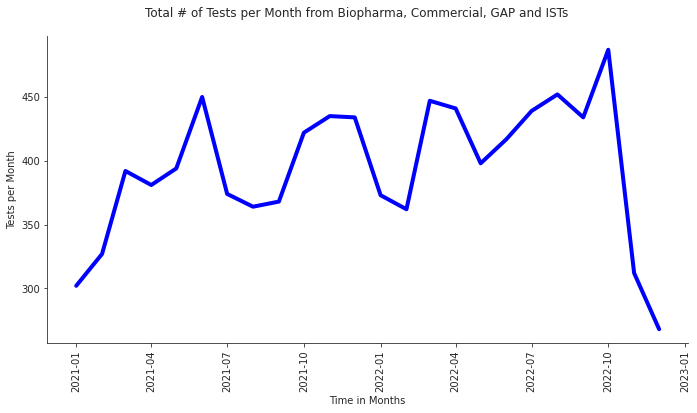

In [269]:
#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = total_sales_regions, x = "Year_Month", y = "Sales", kind = "line", color = "blue", linewidth=4 ,height=5, aspect=10/5)
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Total # of Tests per Month from Biopharma, Commercial, GAP and ISTs', y=1.05)

plt.savefig('total_sales.pdf', dpi = 300, bbox_inches ="tight",pad_inches = 1)
files.download("total_sales.pdf")
plt.show()

In [270]:
#Calculate the annual growth rate
all_samples.groupby(['Year'])["Sales"].sum().reset_index()

,Year,Sales
0,2021,4643
1,2022,4830


In [271]:
#Growth rate region
4830/4643

1.040275683825113

In [272]:
all_samples_by_type = all_samples.groupby(['Year_Month', "Type"]).sum().reset_index()
all_samples_by_type.head(3)

,Year_Month,Type,Sales,Month,Quarter,Year
0,2021-01-01,Biopharma,66,66,66,133386
1,2021-01-01,Commercial,93,93,93,187953
2,2021-01-01,GAP,74,74,74,149554


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

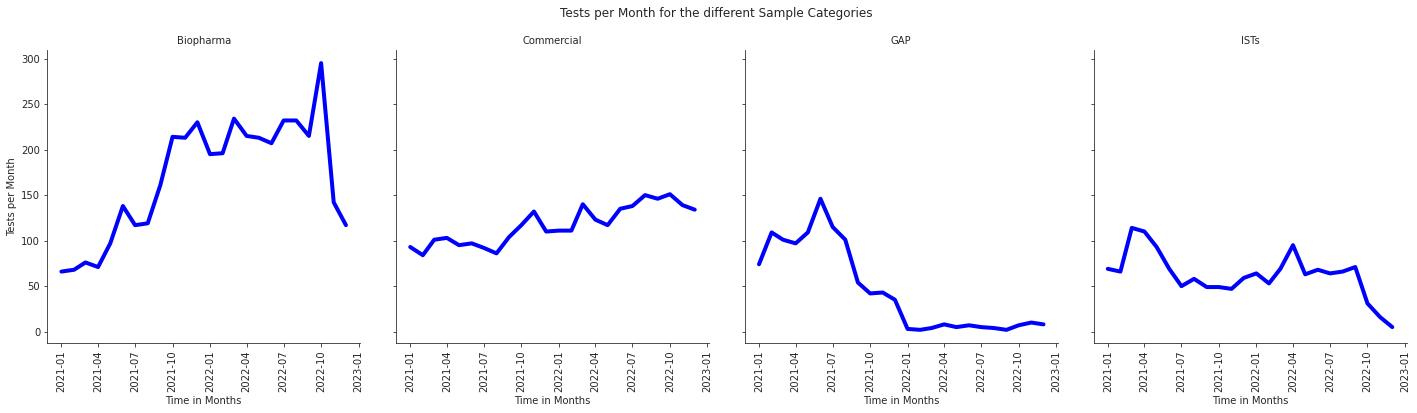

In [273]:
#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = all_samples_by_type, x = "Year_Month", y = "Sales", kind = "line", col = "Type", color = "blue", linewidth=4 )
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Tests per Month for the different Sample Categories', y=1.05)

plt.savefig("type_by_country.pdf", dpi = 300, bbox_inches ="tight",pad_inches = 1)
files.download("type_by_country.pdf")
plt.show()

In [274]:
#Calculate the annual sample volume growth rate

comm_cases = all_samples[all_samples["Type"] == "Commercial"]
comm_cases.groupby("Year")["Sales"].sum()

Year
2021    1214
2022    1595
Name: Sales, dtype: int64

In [275]:
1595/1214

1.313838550247117

In [276]:
#Create a dataframe with just the topx countries by number of tests sold
#top_x = countries_df.groupby('Reporting Country').sum().sort_values("Sales",ascending = False).head(num_countries)
##top_x_list = top_x.index.tolist()
#top_x_sales =countries_df[countries_df['Reporting Country'].isin(top_x_list)]
#print(f"The top {num_countries} countries have {top_x_sales.shape[0]} samples which represents {top_x_sales.shape[0]/countries_df.shape[0]:.2%}")

### Analyze the annual sample volume  and the annual growth rate by region and grouped by Type


In [277]:
all_samples.index.min()

Timestamp('2021-01-02 00:00:00')

In [278]:
all_samples.head()

,Accession #,Reporting Country,Cancer Type,Sales,Year_Month,Sub_region,AE_supported,Currency,Type,Month,Quarter,Year
Date Received,,,,,,,,,,,,
2022-12-30,A0639651,GERMANY,NaN,1,2022-12-01,Europe,non_AE,EUR,Commercial,12,4,2022
2022-12-30,A0644802,UNITED KINGDOM,Breast,1,2022-12-01,Europe,AE,GBP,NaN,12,4,2022
2022-12-30,A0639406,CANADA,Breast,1,2022-12-01,Americas,AE,USD,Biopharma,12,4,2022
2022-12-30,A0639391,SPAIN,NaN,1,2022-12-01,Europe,AE,EUR,Biopharma,12,4,2022
2022-12-30,A0639683,TURKEY,NaN,1,2022-12-01,Europe,AE,USD,Commercial,12,4,2022


In [279]:
all_samples.groupby(["Year", "Type"])["Sales"].sum()

Year  Type      
2021  Biopharma     1570
      Commercial    1214
      GAP           1026
      ISTs           833
2022  Biopharma     2493
      Commercial    1595
      GAP             65
      ISTs           665
Name: Sales, dtype: int64

In [280]:
all_samples.groupby(["Year", "Quarter", "Type"])["Sales"].sum()

Year  Quarter  Type      
2021  1        Biopharma     210
               Commercial    278
               GAP           284
               ISTs          249
      2        Biopharma     306
               Commercial    295
               GAP           352
               ISTs          272
      3        Biopharma     397
               Commercial    282
               GAP           270
               ISTs          157
      4        Biopharma     657
               Commercial    359
               GAP           120
               ISTs          155
2022  1        Biopharma     625
               Commercial    362
               GAP             9
               ISTs          186
      2        Biopharma     635
               Commercial    375
               GAP            20
               ISTs          226
      3        Biopharma     679
               Commercial    434
               GAP            11
               ISTs          201
      4        Biopharma     554
               Co

# Analysing the breakdown of commercial samples

In [281]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3819 entries, 0 to 3818
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Accession #            3819 non-null   object        
 1   Reporting Country      3819 non-null   object        
 2   Test Ordered           3819 non-null   object        
 3   Billing Type           3819 non-null   object        
 4   LIMS Project ID        3819 non-null   object        
 5   Account: Account Name  3819 non-null   object        
 6   Contact: Full Name     3819 non-null   object        
 7   Final Report Date      3800 non-null   object        
 8   Test Type              3819 non-null   object        
 9   Cancer Type            1261 non-null   object        
 10  Type                   3819 non-null   category      
 11  AE_supported           3819 non-null   object        
 12  Currency               3819 non-null   object        
 13  Sub

In [282]:
df_merged.head(1)

,Accession #,Reporting Country,Test Ordered,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Year_Month,Month_to_match,FOC,Invoiced Ammount
0,A0643676,UNITED KINGDOM,Guardant Reveal,Self-Pay Patient,GHI_10,The Nuffield Hospital Guildford,Tony Dhillon,NaN,LUNAR1_CRC,NaN,Commercial,AE,GBP,Europe,1,2023,1,1,2023-01-01,2023-1,Paid,??


In [283]:
#Select the time horizion to analyse
start_date_com = "2021-01-01"
end_date_com = "2022-12-31"
#Select the # of countries to be analyses based on the maxiumum number of samplesin 
#the time horizon
num_countries_comm = 32
#The the Year_Month columns as index to allow for easier slicing
df_merged = df_merged.set_index("Year_Month").sort_index()
#Create the dataframe relevant for the time periode which should be analysed
df_merged_time_horizon = df_merged.loc[start_date_com:end_date_com].copy().reset_index()
print(f"The total number of samples in this dataframe is {df_merged_time_horizon.shape[0]}")

The total number of samples in this dataframe is 2805


In [284]:
#identiy the top commercial countries
df_merged_time_horizon["FOC"] = df_merged_time_horizon["FOC"].astype("string")

#Create the dataframe relevant for the time periode which should be analysed

print(f"The total number of samples in this dataframe is {df_merged_time_horizon.shape[0]}")


The total number of samples in this dataframe is 2805


In [285]:
df_merged_time_horizon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Year_Month             2805 non-null   datetime64[ns]
 1   Accession #            2805 non-null   object        
 2   Reporting Country      2805 non-null   object        
 3   Test Ordered           2805 non-null   object        
 4   Billing Type           2805 non-null   object        
 5   LIMS Project ID        2805 non-null   object        
 6   Account: Account Name  2805 non-null   object        
 7   Contact: Full Name     2805 non-null   object        
 8   Final Report Date      2803 non-null   object        
 9   Test Type              2805 non-null   object        
 10  Cancer Type            906 non-null    object        
 11  Type                   2805 non-null   category      
 12  AE_supported           2805 non-null   object        
 13  Cur

In [286]:
#Create a dataframe with just the topx countries by number of tests sold
#top_comm_x = df_merged_time_horizon.groupby('Reporting Country').sum().sort_values("Sales",ascending = False).head(num_countries_comm)
#top_comm_x_list = top_comm_x.index.tolist()
#List of countries based on Ian's input
country_list = ['UNITED KINGDOM', 'SPAIN', 'BRAZIL', 'TURKEY', 'CANADA']
top_comm_x_sales =df_merged_time_horizon[df_merged_time_horizon['Reporting Country'].isin(country_list)]
print(f"The top 5 countries have {top_comm_x_sales.shape[0]} samples which represents {top_comm_x_sales.shape[0]/df_merged_time_horizon.shape[0]:.2%}")

The top 5 countries have 2494 samples which represents 88.91%


In [287]:
#top_comm_x_list

In [288]:
#merged_top_x_countries = df_merged[df_merged['Reporting Country'].isin(top_comm_x_list)]
#merged_top_x_countries["Reporting Country"].value_counts()

In [289]:
list_for_FOC_analysis = [
 'Reporting Country',
 'Type',
 'Sales', 'FOC',
 'Year_Month']

In [290]:
#Create the main data frame for the further analysis
commercial_sales_FOC_analysis_df = top_comm_x_sales[list_for_FOC_analysis]
commercial_sales_FOC_analysis_df["FOC"] = commercial_sales_FOC_analysis_df["FOC"].astype("category")

#This is the main dataframe
commercial_sales_FOC_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2494 entries, 0 to 2804
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Reporting Country  2494 non-null   object        
 1   Type               2494 non-null   category      
 2   Sales              2494 non-null   int64         
 3   FOC                2494 non-null   category      
 4   Year_Month         2494 non-null   datetime64[ns]
dtypes: category(2), datetime64[ns](1), int64(1), object(1)
memory usage: 83.1+ KB


In [291]:
commercial_sales_FOC_analysis_df["FOC"].value_counts()

Paid    1935
Free     559
Name: FOC, dtype: int64

In [292]:
FOC_df = commercial_sales_FOC_analysis_df.groupby(['Year_Month','Reporting Country', "FOC"]).sum().reset_index()
FOC_df.tail()


,Year_Month,Reporting Country,FOC,Sales
235,2022-12-01,SPAIN,Paid,8
236,2022-12-01,TURKEY,Free,0
237,2022-12-01,TURKEY,Paid,18
238,2022-12-01,UNITED KINGDOM,Free,31
239,2022-12-01,UNITED KINGDOM,Paid,46


In [293]:
#start = "2022-01-01"
#end = "2022-12-31"
#var1 = df_merged_time_horizon.set_index("Year_Month")

#var2 = var1[start:end]
#var2[var2["Reporting Country"] == "UNITED KINGDOM"].head(50)

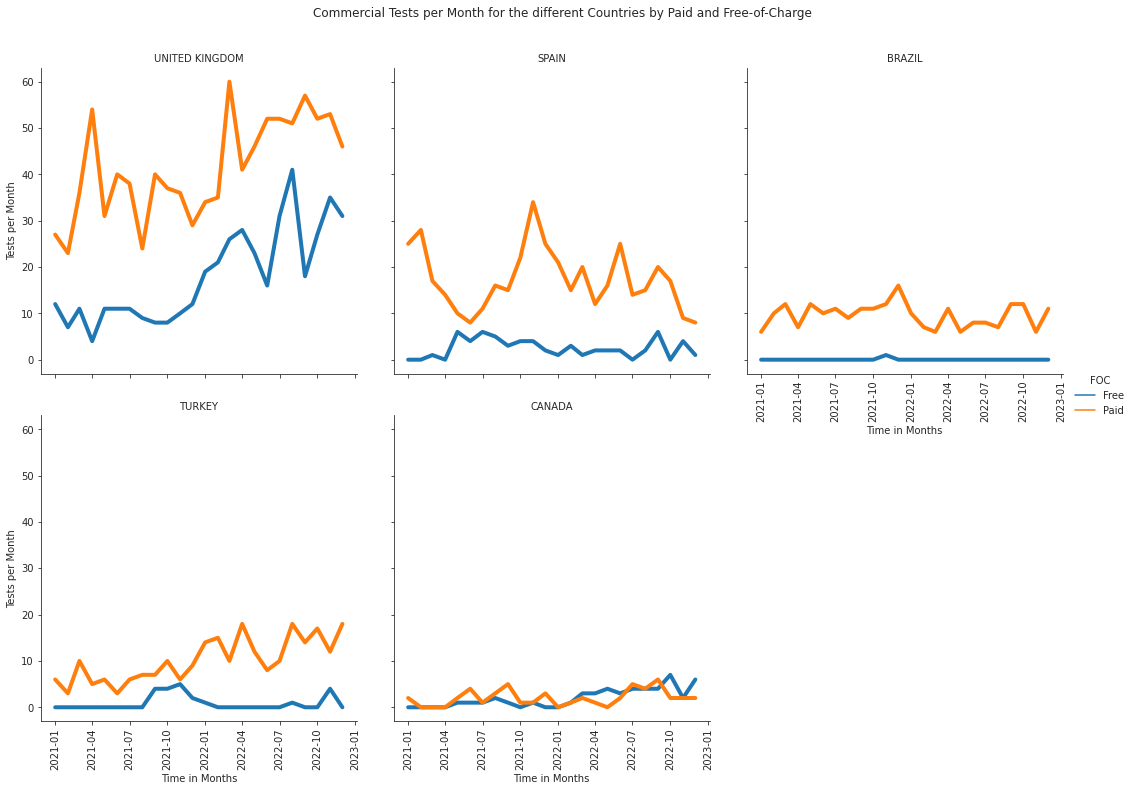

In [294]:


#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = FOC_df, x = "Year_Month", y = "Sales", kind = "line", hue = "FOC", col = "Reporting Country", color = "#7851a9", linewidth=4 , ci = None, col_wrap = 3
                ,col_order = country_list
                )
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Commercial Tests per Month for the different Countries by Paid and Free-of-Charge', y=1.05)

#plt.savefig("free_by_country.pdf", dpi = 300, bbox_inches ="tight",pad_inches = 1)
#files.download("free_by_country.pdf")

# using padding

plt.show()


In [295]:
#Total sales
all_countries_comm = FOC_df.groupby(['Year_Month', "FOC"]).sum().reset_index()
all_countries_comm.sample(3)

,Year_Month,FOC,Sales
27,2022-02-01,Paid,73
17,2021-09-01,Paid,78
4,2021-03-01,Free,12


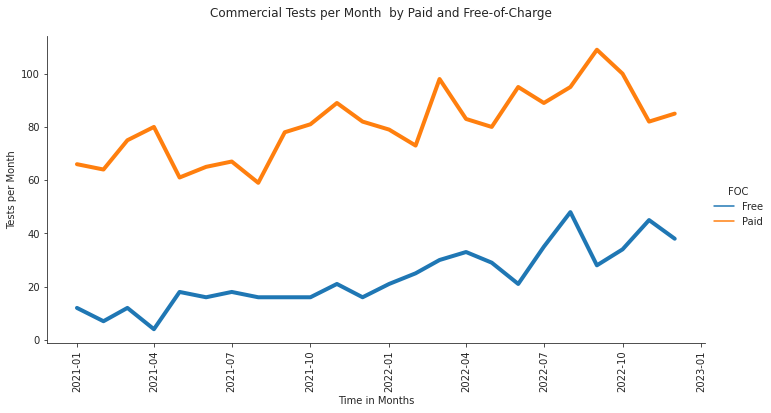

In [296]:
#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = all_countries_comm , x = "Year_Month", y = "Sales", kind = "line", hue = "FOC",  color = "#7851a9", linewidth=4 , 
                ci = None, height=5, aspect=10/5)
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle(f"Commercial Tests per Month  by Paid and Free-of-Charge", y=1.05)

#plt.savefig('comm_all.pdf', dpi = 300, bbox_inches ="tight",
            #pad_inches = 1)
#files.download("comm_all.pdf")
plt.show()

In [297]:
#All Commercial cases including free
all_countries_incl_free = commercial_sales_FOC_analysis_df.groupby(['Year_Month']).sum().reset_index()
all_countries_incl_free.head()

,Year_Month,Sales
0,2021-01-01,78
1,2021-02-01,71
2,2021-03-01,87
3,2021-04-01,84
4,2021-05-01,79


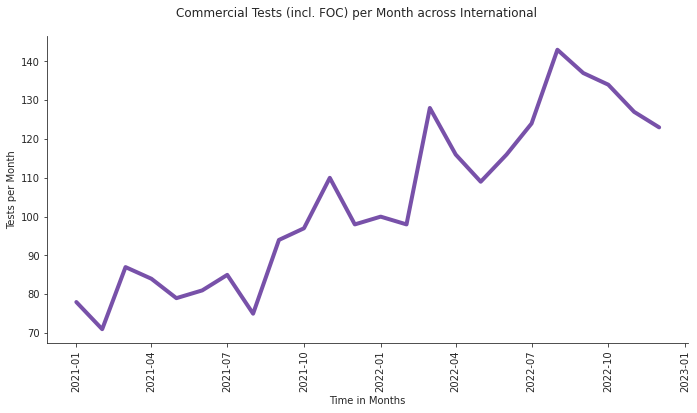

In [298]:
##Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = all_countries_incl_free  , x = "Year_Month", y = "Sales", kind = "line",  color = "#7851a9", linewidth=4 , 
                ci = None, height=5, aspect=10/5)
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle(f"Commercial Tests (incl. FOC) per Month across International", y=1.05)

#plt.savefig('comm_all_with_FOC.pdf', dpi = 300, bbox_inches ="tight",
            #pad_inches = 1)
#files.download("comm_all_with_FOC.pdf")
plt.show()

# Rolling Mean Analysis

In [299]:

commercial_sales_rolling_df = commercial_sales_FOC_analysis_df.groupby(["Year_Month"])["Sales"].sum().reset_index()

In [300]:
commercial_sales_rolling_df["Rolling 3-Month Average"] = commercial_sales_rolling_df["Sales"].rolling(3).mean()

In [301]:
commercial_sales_rolling_df.head()

,Year_Month,Sales,Rolling 3-Month Average
0,2021-01-01,78,NaN
1,2021-02-01,71,NaN
2,2021-03-01,87,78.67
3,2021-04-01,84,80.67
4,2021-05-01,79,83.33


In [302]:
melt = commercial_sales_rolling_df.melt(id_vars = "Year_Month", value_vars = ["Sales", "Rolling 3-Month Average"], value_name= "Smoothed Sales")

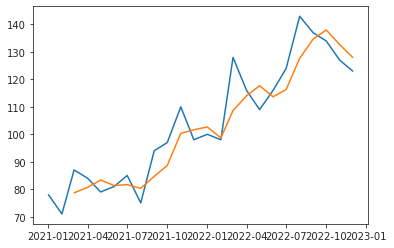

In [303]:
fig, ax = plt.subplots()
ax.plot(commercial_sales_rolling_df["Year_Month"],commercial_sales_rolling_df["Sales"])
ax.plot(commercial_sales_rolling_df["Year_Month"],commercial_sales_rolling_df["Rolling 3-Month Average"])
plt.show()

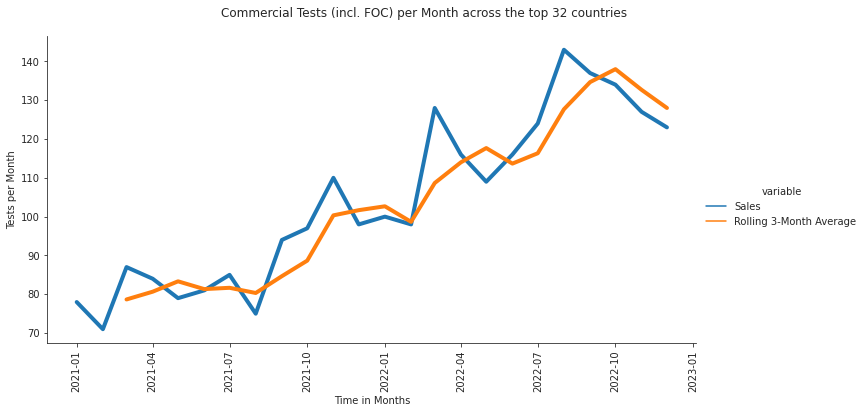

In [304]:
#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = melt  , x = "Year_Month", y = "Smoothed Sales", hue = "variable", kind = "line",  color = "#7851a9",
                linewidth=4 , 
                ci = None, height=5, aspect=10/5)

g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle(f"Commercial Tests (incl. FOC) per Month across the top {num_countries_comm} countries", y=1.05)

#plt.savefig('comm_all_with_FOC.pdf', dpi = 300, bbox_inches ="tight",
            #pad_inches = 1)
#files.download("comm_all_with_FOC.pdf")
plt.show()

# Percentages growth

In [305]:
commercial_sales_FOC_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2494 entries, 0 to 2804
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Reporting Country  2494 non-null   object        
 1   Type               2494 non-null   category      
 2   Sales              2494 non-null   int64         
 3   FOC                2494 non-null   category      
 4   Year_Month         2494 non-null   datetime64[ns]
dtypes: category(2), datetime64[ns](1), int64(1), object(1)
memory usage: 83.1+ KB


In [306]:
commercial_sales_FOC_analysis_df.head()

,Reporting Country,Type,Sales,FOC,Year_Month
0,SPAIN,Commercial,1,Paid,2021-01-01
1,UNITED KINGDOM,Commercial,1,Paid,2021-01-01
2,SPAIN,Commercial,1,Paid,2021-01-01
3,SPAIN,Commercial,1,Paid,2021-01-01
4,BRAZIL,Commercial,1,Paid,2021-01-01


In [307]:
#Creat a data set with the monthly revenue for all countries, Calcualte the percent growth by using the percent_change function
commercial_percent = commercial_sales_FOC_analysis_df.groupby(["Year_Month"]).sum().reset_index().set_index("Year_Month")

In [308]:
commercial_percent["Annual_Growth(%)"] = commercial_percent.pct_change(periods = 12).mul(100)

In [309]:
commercial_percent.tail()

,Sales,Annual_Growth(%)
Year_Month,,
2022-08-01,143,90.67
2022-09-01,137,45.74
2022-10-01,134,38.14
2022-11-01,127,15.45
2022-12-01,123,25.51


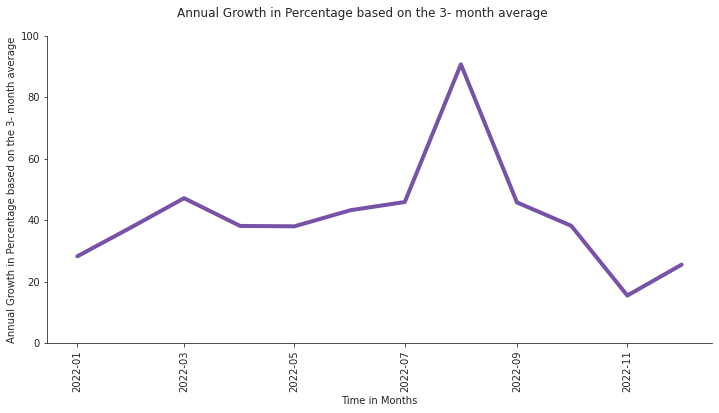

In [310]:
#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = commercial_percent  , x = "Year_Month", y = "Annual_Growth(%)", kind = "line",  color = "#7851a9", linewidth=4 , 
                ci = None, height=5, aspect=10/5)
g.set_xticklabels(rotation = "90")

g.set(ylim = (0,100))
g.set_ylabels("Annual Growth in Percentage based on the 3- month average")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle(f"Annual Growth in Percentage based on the 3- month average", y=1.05)

#plt.savefig('comm_all_with_FOC.pdf', dpi = 300, bbox_inches ="tight",
            #pad_inches = 1)
#files.download("comm_all_with_FOC.pdf")
plt.show()

In [311]:
#Calculate the percentage growth based on the 3 month rolling mean
commercial_sales_rolling_df["Percent_growth_3_month_average"] = commercial_sales_rolling_df.set_index("Year_Month")["Rolling 3-Month Average"].pct_change(periods=6).mul(100)

In [312]:
#commercial_sales_rolling_df

# Charts for Rev Core

In [313]:
#Chart 1

In [314]:
all_samples.reset_index()

,Date Received,Accession #,Reporting Country,Cancer Type,Sales,Year_Month,Sub_region,AE_supported,Currency,Type,Month,Quarter,Year
0,2022-12-30,A0639651,GERMANY,NaN,1,2022-12-01,Europe,non_AE,EUR,Commercial,12,4,2022
1,2022-12-30,A0644802,UNITED KINGDOM,Breast,1,2022-12-01,Europe,AE,GBP,NaN,12,4,2022
2,2022-12-30,A0639406,CANADA,Breast,1,2022-12-01,Americas,AE,USD,Biopharma,12,4,2022
3,2022-12-30,A0639391,SPAIN,NaN,1,2022-12-01,Europe,AE,EUR,Biopharma,12,4,2022
4,2022-12-30,A0639683,TURKEY,NaN,1,2022-12-01,Europe,AE,USD,Commercial,12,4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9468,2021-01-02,A0317051,UNITED KINGDOM,NaN,1,2021-01-01,Europe,AE,GBP,GAP,1,1,2021
9469,2021-01-02,A0317196,SPAIN,NaN,1,2021-01-01,Europe,AE,EUR,GAP,1,1,2021
9470,2021-01-02,A0317208,SWITZERLAND,NaN,1,2021-01-01,Europe,non_AE,EUR,Biopharma,1,1,2021
9471,2021-01-02,A0317115,UNITED KINGDOM,NaN,1,2021-01-01,Europe,AE,GBP,Commercial,1,1,2021


In [315]:
all_samples.groupby(["Year_Month", "Sub_region", "Type"])["Sales"].sum().reset_index().tail(10)

,Year_Month,Sub_region,Type,Sales
157,2022-11-01,Europe,Biopharma,133
158,2022-11-01,Europe,Commercial,126
159,2022-11-01,Europe,GAP,10
160,2022-11-01,Europe,ISTs,15
161,2022-12-01,Americas,Biopharma,7
162,2022-12-01,Americas,Commercial,19
163,2022-12-01,Europe,Biopharma,110
164,2022-12-01,Europe,Commercial,115
165,2022-12-01,Europe,GAP,8
166,2022-12-01,Europe,ISTs,5


In [316]:
# Figure out the commercial volume by region in October 2022

In [317]:
#df_merged_time_horizon.groupby(["Year_Month", "Sub_region"])["Sales"].sum().reset_index()

AE vs non_AE countries

In [318]:
AE_analysis = df_merged_time_horizon.groupby(["Year_Month", "AE_supported"])["Sales"].sum().reset_index()

In [319]:
AE_pivot = AE_analysis.pivot(index = "Year_Month", columns = "AE_supported", values = "Sales")

In [320]:
AE_pivot.tail()

AE_supported,AE,non_AE
Year_Month,,
2022-08-01,144,6
2022-09-01,138,8
2022-10-01,135,15
2022-11-01,127,12
2022-12-01,123,9


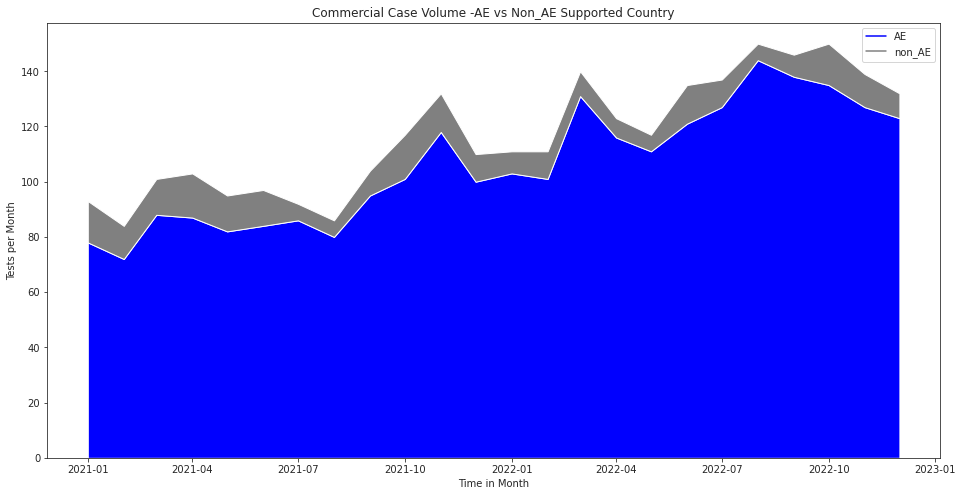

In [321]:
# Stackplot with X, Y, colors value
#plt.style.use('ggplot')
plt.subplots(figsize=(16, 8))


# Plot x-labels, y-label and data
plt.plot([], [], color ="blue",
         label ="AE")
plt.plot([], [], color ='grey',
         label ='non_AE')



plt.stackplot(AE_pivot.index, AE_pivot["AE"],
              AE_pivot["non_AE"],
             
              colors =["blue", 'grey'])
 
plt.grid(False)
plt.legend(loc='upper right')
# Days
plt.xlabel('Time in Month')
 
# No of hours
plt.ylabel('Tests per Month')
 
# Title of Graph
plt.title('Commercial Case Volume -AE vs Non_AE Supported Country')

 
# Displaying Graph


plt.savefig("test_t.pdf", transparent = True)
#files.download("test_t.pdf")
plt.show()

In [322]:
# Commercial volume 

In [323]:
top_commercial_countries = top_comm_x_sales.groupby(["Year_Month", "Reporting Country"])["Sales"].sum().reset_index()
top_commercial_countries.head()

,Year_Month,Reporting Country,Sales
0,2021-01-01,BRAZIL,6
1,2021-01-01,CANADA,2
2,2021-01-01,SPAIN,25
3,2021-01-01,TURKEY,6
4,2021-01-01,UNITED KINGDOM,39


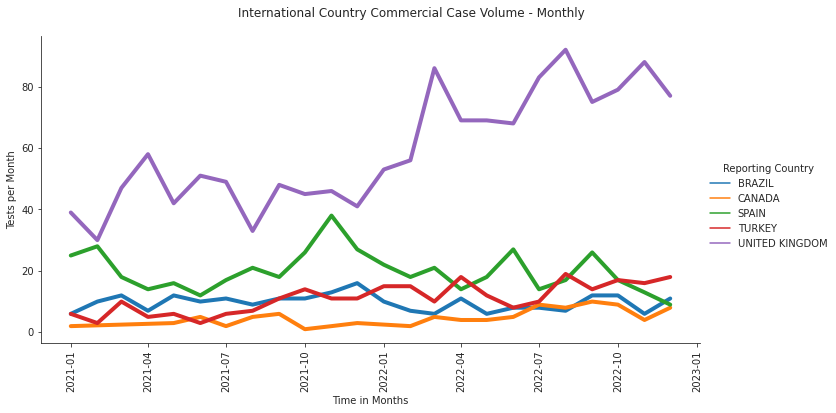

In [324]:
#sns.set_style("whitegrid")
with mpl.rc_context({'axes.grid': False}):
  g = sns.relplot(data = top_commercial_countries  , x = "Year_Month", y = "Sales", hue = "Reporting Country", kind = "line",
                linewidth=4 , ci = None, height=5, aspect=10/5)

g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle(f"International Country Commercial Case Volume - Monthly", y=1.05)

#plt.savefig('comm_all_with_FOC.pdf', dpi = 300, bbox_inches ="tight",
            #pad_inches = 1)
#files.download("comm_all_with_FOC.pdf")

plt.show()

# Frequency plots

In [325]:
df_merged_time_horizon.sample(3)

,Year_Month,Accession #,Reporting Country,Test Ordered,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Month_to_match,FOC,Invoiced Ammount
2249,2022-09-01,A0581871,SPAIN,Guardant 360,Distributors : ROW,GHI_19,Institute of Breast Cancer,Javier Cortes,10/4/2022,Guardant360 CDx EU,Breast,Commercial,AE,EUR,Europe,9,2022,3,1,2022-9,Paid,2366 EUR
2156,2022-08-01,A0567594,SPAIN,Guardant 360,Self-Pay Patient,GHI_19,Hospital Nuestra Senora de Sonsoles,Jose Enrique Ales,9/1/2022,Guardant360 CDx EU,NaN,Commercial,AE,EUR,Europe,8,2022,3,1,2022-8,Paid,1745 EUR
2172,2022-08-01,A0556794,UNITED KINGDOM,Guardant 360,Self-Pay Patient,GHI_19,Addenbrooke's Hospital,Elizabeth Smyth,8/12/2022,Guardant360 CDx EU,GI,Commercial,AE,GBP,Europe,8,2022,3,1,2022-8,Paid,2490 GBP


In [326]:
all_clini = df_merged_time_horizon["Contact: Full Name"].tolist()

In [327]:
unique_clinician = set(all_clini)

# Productionized version of three monthly clinician ordering frequency

In [328]:
#Input dataframe
input_df_freq_count = df_merged_time_horizon
#Define the list of countries
countries_clinician_list = [ 'UNITED KINGDOM' ]


In [329]:
#Helper function
def count_clinician(num):
  if num > 4:
    return "More than five"
  if num > 1 & num <=4:
    return  "Between 2 to 5 test"
  if num == 1:
    return "One test in three months"

In [330]:
#Select a dataframe with the rows for the specific country
freq_country_df= input_df_freq_count[input_df_freq_count['Reporting Country'].isin(countries_clinician_list)].set_index("Year_Month")
freq_country_df.tail()

,Accession #,Reporting Country,Test Ordered,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Month_to_match,FOC,Invoiced Ammount
Year_Month,,,,,,,,,,,,,,,,,,,,,
2022-12-01,A0627679,UNITED KINGDOM,Guardant 360,Self-Pay Patient,GHI_19,Royal Surrey County Hospital - St Luke's Cance...,Sophie Otter,12/13/2022,Guardant360 CDx EU,NaN,Commercial,AE,GBP,Europe,12,2022,4,1,2022-12,Paid,2240 GBP
2022-12-01,A0627681,UNITED KINGDOM,Guardant 360,Self-Pay Patient,GHI_19,"Northwick Park Hospital, London North West Uni...",Arshi Denton,12/13/2022,Guardant360 CDx EU,NaN,Commercial,AE,GBP,Europe,12,2022,4,1,2022-12,Paid,1245 GBP
2022-12-01,A0628368,UNITED KINGDOM,Guardant 360,Self-Pay Patient,GH2_12,Velindre Cancer Centre,Samantha Cox,12/15/2022,Guardant 360,NaN,Commercial,AE,GBP,Europe,12,2022,4,1,2022-12,Free,0 GBP
2022-12-01,A0628388,UNITED KINGDOM,Guardant 360,Self-Pay Patient,GHI_19,Charing Cross Hospital Medical Oncology Depart...,Waleed Mohammed,12/13/2022,Guardant360 CDx EU,NaN,Commercial,AE,GBP,Europe,12,2022,4,1,2022-12,Paid,1245 GBP
2022-12-01,A0627682,UNITED KINGDOM,Guardant 360,Self-Pay Patient,GHI_19,Western General Hospital - Edinburgh Cancer Ce...,Almudena Cascales,12/19/2022,Guardant360 CDx EU,NaN,Commercial,AE,GBP,Europe,12,2022,4,1,2022-12,Free,0 GBP


In [331]:
start_date_freq = "2021-01-01"
end_date_freq = "2022-12-31"
lookback_periode = 3 # in month
lookback_periode_slice = lookback_periode
#list_countries_freq = ["Spain"]
list_month = pd.date_range(start = start_date_freq, end = end_date_freq, freq = "M")


In [332]:
from pandas.tseries.frequencies import DateOffset




# intermediate_start = pd.to_datetime(start_date_freq) + DateOffset(months = lookback_periode)
# intermediate_end = pd.to_datetime(intermediate_start) + DateOffset(months = lookback_periode)

In [333]:
#dataframe = pd.DataFrame(columns=["Date", "Freq_Categories",  "Frequency"])
data = []
for month in list_month[lookback_periode_slice:]:
  intermediate_end = pd.to_datetime(month)
  intermediate_start = intermediate_end - DateOffset(months = lookback_periode)
  #print(intermediate_end)
  #print(intermediate_start)
  Interim_fre_df_1 = freq_country_df[intermediate_start:intermediate_end]
  #Interim_fre_df_2 = Interim_fre_df_1[Interim_fre_df_1["Reporting Country"].isin(list_countries_freq)]
  Interim_fre_df_3 = Interim_fre_df_1["Contact: Full Name"].value_counts()
  interim_freq_dict = {"Frequency": Interim_fre_df_3, "Date" : intermediate_start}
  freq_counts = pd.DataFrame(interim_freq_dict)
  freq_counts["Freq_Categories"] = freq_counts["Frequency"].apply(count_clinician)
  final = freq_counts.groupby(["Date", "Freq_Categories"])["Frequency"].count().reset_index()
  intermediate_start = intermediate_start + DateOffset(months = 1)
  data.append(final)

In [334]:
freq_plot_df = pd.concat(data)
freq_plot_df.tail()

,Date,Freq_Categories,Frequency
1,2022-08-30,More than five,5
2,2022-08-30,One test in three months,98
0,2022-09-30,Between 2 to 5 test,36
1,2022-09-30,More than five,5
2,2022-09-30,One test in three months,102


In [335]:
dd = freq_plot_df.pivot(index= "Date", columns = "Freq_Categories", values = "Frequency").reset_index()
dd = dd.melt(id_vars= "Date", value_name= "Frequency")
dd.sample(3)

,Date,Freq_Categories,Frequency
2,2021-03-30,Between 2 to 5 test,20
0,2021-01-30,Between 2 to 5 test,20
8,2021-09-30,Between 2 to 5 test,21


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

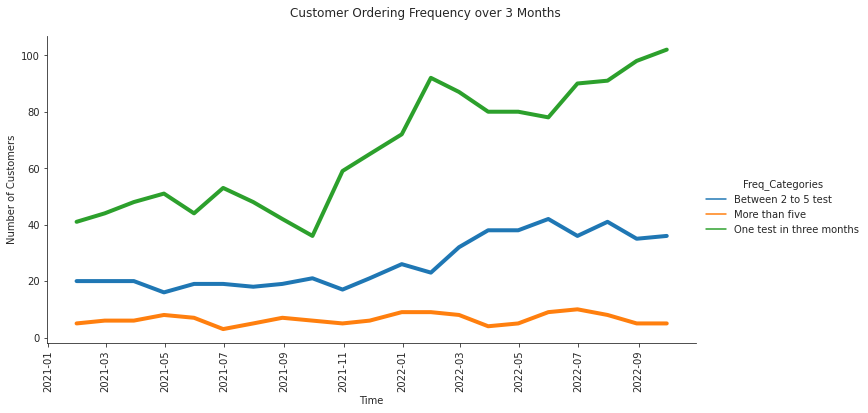

In [336]:
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = dd  , x = "Date", y = "Frequency", hue = "Freq_Categories", kind = "line",
                linewidth=4 , ci = None, height=5, aspect=10/5)

g.set_xticklabels(rotation = "90")

g.set_ylabels("Number of Customers")
g.set_xlabels("Time")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle(f"Customer Ordering Frequency over 3 Months", y=1.05)

plt.savefig('comm_all_with_FOC.pdf', dpi = 300, bbox_inches ="tight",pad_inches = 1)
files.download("comm_all_with_FOC.pdf")
plt.show()

# Revenue Analysis

In [337]:
#Create the data farme that will be used for revenue analysis
revenue_start = df_merged_time_horizon.copy()
revenue_start["Invoiced Ammount"] = revenue_start["Invoiced Ammount"].astype("string")

In [338]:
revenue_start["Invoiced Ammount"]

0         2490.0
1         2490.0
2         2303.0
3         2500.0
4         1350.0
          ...   
2800    1245 GBP
2801      2319.0
2802       0 GBP
2803    1245 GBP
2804       0 GBP
Name: Invoiced Ammount, Length: 2805, dtype: string

In [339]:
revenue_start.head()

,Year_Month,Accession #,Reporting Country,Test Ordered,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Month_to_match,FOC,Invoiced Ammount
0,2021-01-01,A0322437,SPAIN,Guardant 360,Distributors : ROW,GHI_01,Hospital Quironsalud Sagrado Corazon,Juan Antonio Virizuela,1/26/2021,Guardant 360,NaN,Commercial,AE,EUR,Europe,1,2021,1,1,2021-1,Paid,2490.0
1,2021-01-01,A0322763,UNITED KINGDOM,Guardant 360,Self-Pay Sponsored,GHI_01,The Royal Marsden NHS Foundation Trust,Ian Smith,1/28/2021,Guardant 360,Breast,Commercial,AE,GBP,Europe,1,2021,1,1,2021-1,Paid,2490.0
2,2021-01-01,A0322762,SPAIN,Guardant 360,Distributors : ROW,GHI_01,Hospital Quiron Barcelona,Alejandro Navarro,1/26/2021,Guardant 360,NaN,Commercial,AE,EUR,Europe,1,2021,1,1,2021-1,Paid,2303.0
3,2021-01-01,A0322769,SPAIN,Guardant 360,Distributors : ROW,GHI_01,Clinica Universidad de Navarra,Luis Alfonso Gurpide,1/28/2021,Guardant 360,NaN,Commercial,AE,EUR,Europe,1,2021,1,1,2021-1,Paid,2500.0
4,2021-01-01,A0322768,BRAZIL,Guardant 360,Distributors : ROW,GHI_01,Diagnosticos da America S.A.,Nise Yamaguchi,1/30/2021,Guardant 360,Breast,Commercial,AE,USD,Americas,1,2021,1,1,2021-1,Paid,1350.0


In [340]:
#revenue_start["Revenue(Local_Curr)"] = revenue_start["Invoiced Ammount"].str.extract('(\d+,?.?\d*)')

In [341]:
#revenue_start["Test"] = revenue_start["Invoiced Ammount"].str.extract('(\d+,?.?\d*)')

In [342]:
#revenue_start.tail(15)

In [343]:
revenue_start["Revenue(Local_Curr)"] = revenue_start["Invoiced Ammount"].str.extract('(\d+,?\d*)')
revenue_start["Revenue(Local_Curr)"] = revenue_start["Revenue(Local_Curr)"].fillna("0")
revenue_start["Revenue(Local_Curr)"] = revenue_start["Revenue(Local_Curr)"].str.replace(",","")
revenue_start["Revenue(Local_Curr)"] = revenue_start["Revenue(Local_Curr)"].astype(float)

In [344]:
lookup_currency["Date"] = lookup_currency.index.to_numpy().astype('datetime64[M]').astype(str)
lookup_currency_wide = lookup_currency
lookup_currency_wide.head(3)



,EUR,GBP,old,Unnamed: 4,USD,Date
Month,,,,,,
2015-08-01,1.11,1.56,2022-08-15,NaN,1,2015-08
2015-09-01,1.12,1.53,2022-09-15,NaN,1,2015-09
2015-10-01,1.12,1.53,2022-10-15,NaN,1,2015-10


In [345]:
lookup_currency_long = lookup_currency_wide.melt(id_vars = ["Date"], value_vars = ["EUR", "GBP", "USD"], var_name = "Currency", value_name = "Value")
#lookup_currency.tail(3)


In [346]:
lookup_currency_long

,Date,Currency,Value
0,2015-08,EUR,1.11
1,2015-09,EUR,1.12
2,2015-10,EUR,1.12
3,2015-11,EUR,1.07
4,2015-12,EUR,1.09
...,...,...,...
262,2022-08,USD,1.00
263,2022-09,USD,1.00
264,2022-10,USD,1.00
265,2022-11,USD,1.00


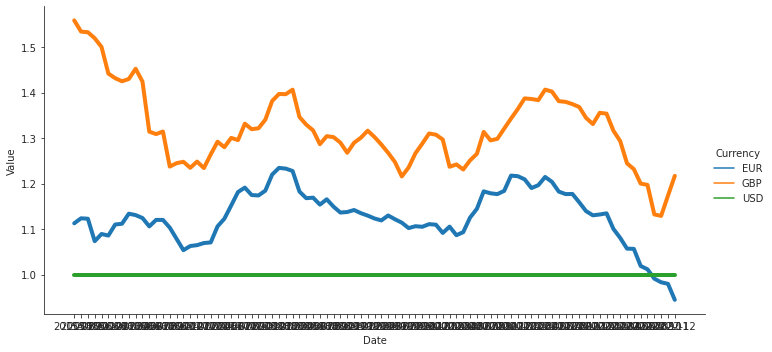

In [347]:
#Helper plot to understand if their are iutliers in the currency data
#lookup_currency_long.plot(x = "Date", y = "Value", hue = "Currency")
sns.relplot(data = lookup_currency_long , x = "Date", y = "Value", hue = "Currency", kind = "line",
                linewidth=4 , ci = None, height=5, aspect=10/5)


In [348]:
# Create a string based column that can be used to lookup a columnb value in other table - Specifically the month_year date
revenue_start["Month_to_match"] = revenue_start["Year_Month"].dt.to_period('M').astype(str)
#revenue_start["Month_to_match"].astype(str).unique().tolist()

# Create a string based column that can be used to lookup a column value in other table - Specifically the currency

In [349]:
lookup_currency_long.sample(3)


,Date,Currency,Value
144,2020-03,GBP,1.24
122,2018-05,GBP,1.35
35,2018-07,EUR,1.17


In [350]:
revenue = revenue_start.merge(lookup_currency_long, left_on = ["Month_to_match", "Currency"], right_on = ["Date", "Currency"])
revenue.shape

(2805, 25)

In [351]:
revenue["Revenue (USD)"] = revenue["Revenue(Local_Curr)"]*revenue["Value"]

In [352]:
revenue.head(1)

,Year_Month,Accession #,Reporting Country,Test Ordered,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Month_to_match,FOC,Invoiced Ammount,Revenue(Local_Curr),Date,Value,Revenue (USD)
0,2021-01-01,A0322437,SPAIN,Guardant 360,Distributors : ROW,GHI_01,Hospital Quironsalud Sagrado Corazon,Juan Antonio Virizuela,1/26/2021,Guardant 360,NaN,Commercial,AE,EUR,Europe,1,2021,1,1,2021-01,Paid,2490.0,2490.0,2021-01,1.22,3028.7


In [353]:
revenue["Revenue(Local_Curr)"]

0       2490.0
1       2303.0
2       2500.0
3       1700.0
4       2303.0
         ...  
2800    2000.0
2801    3341.0
2802    2000.0
2803       0.0
2804    2400.0
Name: Revenue(Local_Curr), Length: 2805, dtype: float64

In [354]:
revenue[(revenue["Revenue(Local_Curr)"] > 0) & (revenue["Revenue(Local_Curr)"] < 1000)]

,Year_Month,Accession #,Reporting Country,Test Ordered,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Month_to_match,FOC,Invoiced Ammount,Revenue(Local_Curr),Date,Value,Revenue (USD)


In [355]:
# Calcualte the ARC for paid cases and free of charge

In [356]:
revenue_month = revenue.groupby(["Month_to_match"])["Revenue (USD)"].sum().reset_index()
revenue_month.head()

,Month_to_match,Revenue (USD)
0,2021-01,200177.19
1,2021-02,185583.65
2,2021-03,197954.91
3,2021-04,192916.21
4,2021-05,148830.29


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

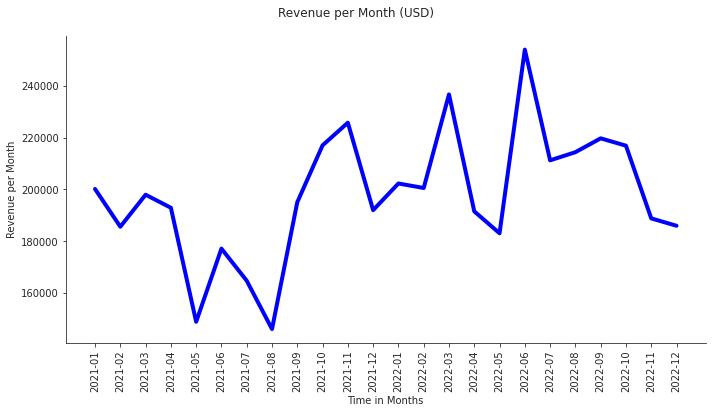

In [357]:
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = revenue_month , x = "Month_to_match", y = "Revenue (USD)", kind = "line",
                linewidth=4 , ci = None, height=5,color = "blue", aspect=10/5)
g.set_xticklabels(rotation = "90")

g.set_ylabels("Revenue per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Revenue per Month (USD)', y=1.05)

plt.savefig('revenue_month.pdf', dpi = 300, bbox_inches ="tight",pad_inches = 1)
files.download("revenue_month.pdf")
plt.show()

In [358]:
revenue.head(2)

,Year_Month,Accession #,Reporting Country,Test Ordered,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Month_to_match,FOC,Invoiced Ammount,Revenue(Local_Curr),Date,Value,Revenue (USD)
0,2021-01-01,A0322437,SPAIN,Guardant 360,Distributors : ROW,GHI_01,Hospital Quironsalud Sagrado Corazon,Juan Antonio Virizuela,1/26/2021,Guardant 360,NaN,Commercial,AE,EUR,Europe,1,2021,1,1,2021-01,Paid,2490.0,2490.0,2021-01,1.22,3028.70
1,2021-01-01,A0322762,SPAIN,Guardant 360,Distributors : ROW,GHI_01,Hospital Quiron Barcelona,Alejandro Navarro,1/26/2021,Guardant 360,NaN,Commercial,AE,EUR,Europe,1,2021,1,1,2021-01,Paid,2303.0,2303.0,2021-01,1.22,2801.25


In [359]:
#Calculate the revenue growth rate

revenue.groupby("Year")["Revenue (USD)"].sum()

Year
2021    2.24e+06
2022    2.51e+06
Name: Revenue (USD), dtype: float64

In [360]:
2.51/2.24

1.1205357142857142

In [361]:
revenue_month.tail(12)

,Month_to_match,Revenue (USD)
12,2022-01,202295.43
13,2022-02,200552.98
14,2022-03,236743.25
15,2022-04,191526.83
16,2022-05,183049.37
17,2022-06,254050.60
18,2022-07,211250.89
19,2022-08,214396.26
20,2022-09,219749.51
21,2022-10,216911.44


In [362]:
revenue_month["3-Month Rolling Average"] = revenue_month["Revenue (USD)"].rolling(3).mean()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

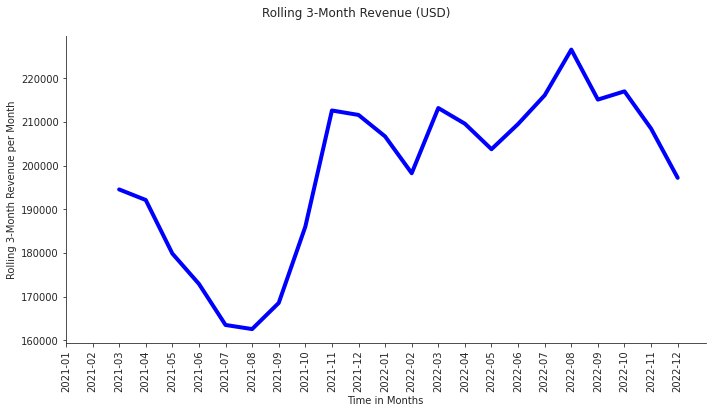

In [363]:
with mpl.rc_context({'axes.grid': False}): 

  g = sns.relplot(data = revenue_month , x = "Month_to_match", y = "3-Month Rolling Average", kind = "line",
                linewidth=4 , ci = None, height=5, aspect=10/5, color = "blue")
g.set_xticklabels(rotation = "90")

g.set_ylabels("Rolling 3-Month Revenue per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Rolling 3-Month Revenue (USD)', y=1.05)

plt.savefig('facet_plot.pdf', dpi = 300, bbox_inches ="tight",
            pad_inches = 1)
files.download("facet_plot.pdf")
plt.show()

In [364]:
#Calculate the annual revenue in 2022
revenue.groupby(["Year"])["Revenue (USD)", "Sales"].sum().reset_index()

,Year,Revenue (USD),Sales
0,2021,2.24e+06,1214
1,2022,2.51e+06,1591


In [365]:
revenue_month.head()

,Month_to_match,Revenue (USD),3-Month Rolling Average
0,2021-01,200177.19,NaN
1,2021-02,185583.65,NaN
2,2021-03,197954.91,194571.92
3,2021-04,192916.21,192151.59
4,2021-05,148830.29,179900.47


### Average Revenue per Case

In [366]:
revenue_ARC = revenue.groupby(["Month_to_match"])["Revenue (USD)", "Sales"].sum().reset_index()
revenue_ARC["ARC"] = revenue_ARC["Revenue (USD)"]/revenue_ARC["Sales"]
revenue_ARC.tail(5)

,Month_to_match,Revenue (USD),Sales,ARC
19,2022-08,214396.26,150,1429.31
20,2022-09,219749.51,146,1505.13
21,2022-10,216911.44,150,1446.08
22,2022-11,188808.10,139,1358.33
23,2022-12,185952.49,132,1408.73


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

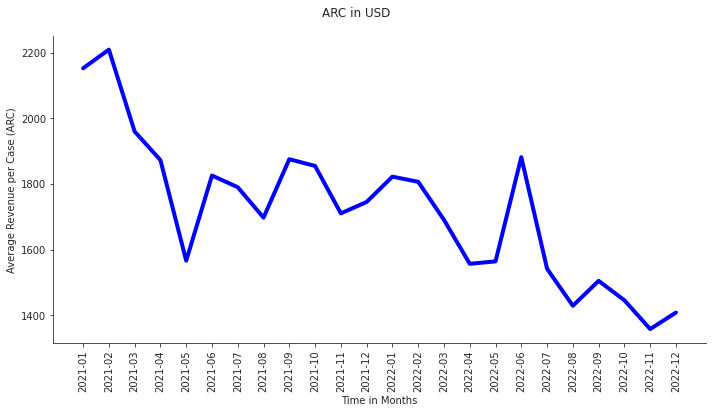

In [367]:
with mpl.rc_context({'axes.grid': False}): 

  g = sns.relplot(data = revenue_ARC , x = "Month_to_match", y = "ARC", kind = "line",
                linewidth=4 , ci = None, height=5, aspect=10/5, color = "blue")
g.set_xticklabels(rotation = "90")

g.set_ylabels("Average Revenue per Case (ARC)")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('ARC in USD', y=1.05)

plt.savefig('ARC.pdf', dpi = 300, bbox_inches ="tight",pad_inches = 1)
files.download('ARC.pdf')
plt.show()

In [368]:
#Calculate the ARC only for paid cases
revenue.shape

(2805, 26)

In [369]:
#Select only the paid cases
revenue_paid = revenue[revenue["FOC"] == "Paid"]


In [370]:
revenue_paid

,Year_Month,Accession #,Reporting Country,Test Ordered,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Month_to_match,FOC,Invoiced Ammount,Revenue(Local_Curr),Date,Value,Revenue (USD)
0,2021-01-01,A0322437,SPAIN,Guardant 360,Distributors : ROW,GHI_01,Hospital Quironsalud Sagrado Corazon,Juan Antonio Virizuela,1/26/2021,Guardant 360,NaN,Commercial,AE,EUR,Europe,1,2021,1,1,2021-01,Paid,2490.0,2490.0,2021-01,1.22,3028.70
1,2021-01-01,A0322762,SPAIN,Guardant 360,Distributors : ROW,GHI_01,Hospital Quiron Barcelona,Alejandro Navarro,1/26/2021,Guardant 360,NaN,Commercial,AE,EUR,Europe,1,2021,1,1,2021-01,Paid,2303.0,2303.0,2021-01,1.22,2801.25
2,2021-01-01,A0322769,SPAIN,Guardant 360,Distributors : ROW,GHI_01,Clinica Universidad de Navarra,Luis Alfonso Gurpide,1/28/2021,Guardant 360,NaN,Commercial,AE,EUR,Europe,1,2021,1,1,2021-01,Paid,2500.0,2500.0,2021-01,1.22,3040.87
3,2021-01-01,A0322630,MEXICO,Guardant 360,Distributors : ROW,GHI_01,ABC Hospital,Jesus Miguel Lazaro de Leon,1/27/2021,Guardant 360,Breast,Commercial,non_AE,EUR,Americas,1,2021,1,1,2021-01,Paid,1700.0,1700.0,2021-01,1.22,2067.79
4,2021-01-01,A0321433,SPAIN,Guardant 360,Distributors : ROW,GHI_01,Hospital Ruber Internacional,Francisco Javier Roman Garcia,1/25/2021,Guardant 360,NaN,Commercial,AE,EUR,Europe,1,2021,1,1,2021-01,Paid,"EUR 2,303.00",2303.0,2021-01,1.22,2801.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,2022-12-01,A0622974,ITALY,Guardant 360,Self-Pay Patient,GHI_19,Istituto Nazionale dei Tumori di Milano,Andrea Vingiani,12/7/2022,Guardant360 CDx EU,NaN,Commercial,non_AE,EUR,Europe,12,2022,4,1,2022-12,Paid,2000 EUR,2000.0,2022-12,0.94,1889.54
2801,2022-12-01,A0626786,GERMANY,Guardant 360,Self-Pay Patient,GH2_12,SLK Kliniken GMBH,Uwe Martens,12/14/2022,Guardant 360,NaN,Commercial,non_AE,EUR,Europe,12,2022,4,1,2022-12,Paid,3341 EUR,3341.0,2022-12,0.94,3156.48
2802,2022-12-01,A0626819,ITALY,Guardant 360,Self-Pay Patient,GHI_19,Istituto Nazionale dei Tumori di Milano,Andrea Vingiani,12/13/2022,Guardant360 CDx EU,NaN,Commercial,non_AE,EUR,Europe,12,2022,4,1,2022-12,Paid,2000 EUR,2000.0,2022-12,0.94,1889.54
2803,2022-12-01,A0626791,FRANCE,Guardant 360,Self-Pay Patient,GHI_19,HEGP Hopital Europeen Georges Pompidou - AP-HP,Julien Taeib,12/12/2022,Guardant360 CDx EU,NaN,Commercial,non_AE,EUR,Europe,12,2022,4,1,2022-12,Paid,<NA>,0.0,2022-12,0.94,0.00


In [371]:
revenue_paid_local = revenue_paid.groupby(["Month_to_match"])["Revenue(Local_Curr)", "Sales"].sum().reset_index()
revenue_paid_local["ARC"] = revenue_paid_local["Revenue(Local_Curr)"]/revenue_paid_local["Sales"]
revenue_paid_local.head(20)

,Month_to_match,Revenue(Local_Curr),Sales,ARC
0,2021-01,163918.0,81,2023.68
1,2021-02,150895.0,77,1959.68
2,2021-03,160469.0,89,1803.02
3,2021-04,152465.0,98,1555.77
4,2021-05,118233.0,69,1713.52
5,2021-06,140481.0,78,1801.04
6,2021-07,132511.0,73,1815.22
7,2021-08,121762.0,66,1844.88
8,2021-09,160110.0,88,1819.43
9,2021-10,180782.0,98,1844.71


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

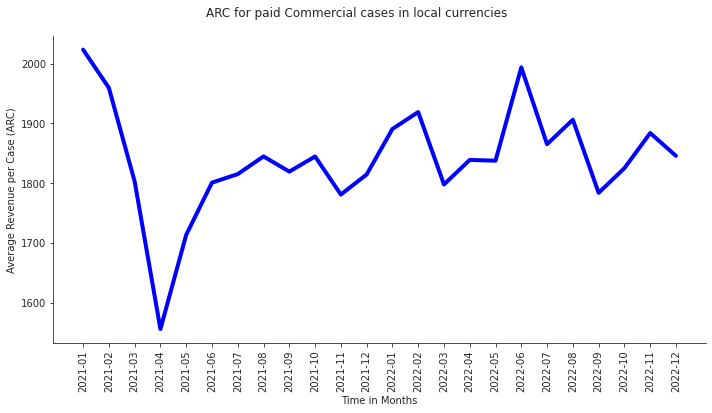

In [372]:
#Plot ARC in local currency
with mpl.rc_context({'axes.grid': False}): 

  g = sns.relplot(data = revenue_paid_local , x = "Month_to_match", y = "ARC", kind = "line",
                linewidth=4 , ci = None, height=5, aspect=10/5, color = "blue")
g.set_xticklabels(rotation = "90")

g.set_ylabels("Average Revenue per Case (ARC)")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('ARC for paid Commercial cases in local currencies', y=1.05)

plt.savefig('local_ARC.pdf', dpi = 300, bbox_inches ="tight",pad_inches = 1)
files.download('local_ARC.pdf')
plt.show()

In [373]:
#ARC in local currency

revenue_paid = revenue_paid.groupby(["Month_to_match"])["Revenue (USD)", "Sales"].sum().reset_index()
revenue_paid["ARC"] = revenue_paid["Revenue (USD)"]/revenue_paid["Sales"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

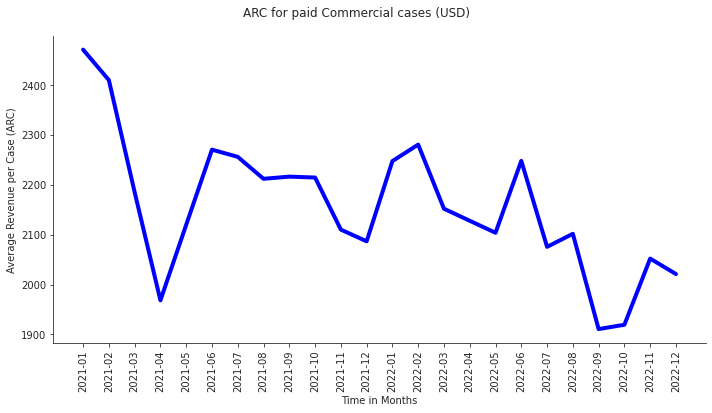

In [374]:
with mpl.rc_context({'axes.grid': False}): 

  g = sns.relplot(data = revenue_paid , x = "Month_to_match", y = "ARC", kind = "line",
                linewidth=4 , ci = None, height=5, aspect=10/5, color = "blue")
g.set_xticklabels(rotation = "90")

g.set_ylabels("Average Revenue per Case (ARC)")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('ARC for paid Commercial cases (USD)', y=1.05)

plt.savefig('ARC.pdf', dpi = 300, bbox_inches ="tight",pad_inches = 1)
files.download('ARC.pdf')
plt.show()

In [375]:
#Select the time horizion to analyse
start_date_ARC = "2020-07-01"
end_date_ARC = "2020-07-31"
#Select the # of countries to be analyses based on the maxiumum number of samplesin 

revenue = revenue.set_index("Year_Month").sort_index()
#Create the dataframe relevant for the time periode which should be analysed
revenue_search = revenue.loc[start_date_ARC:end_date_ARC].copy()

In [376]:
revenue_search.shape

(0, 25)

In [377]:
revenue_search["Revenue (USD)"].max()

nan

In [378]:
revenue_search[75:]

,Accession #,Reporting Country,Test Ordered,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Month_to_match,FOC,Invoiced Ammount,Revenue(Local_Curr),Date,Value,Revenue (USD)
Year_Month,,,,,,,,,,,,,,,,,,,,,,,,,


In [379]:
Q4 = revenue.groupby(["Year", "Quarter", "Reporting Country"])["Sales"].sum()

In [380]:
Q4.tail(20)

Year  Quarter  Reporting Country
2022  3        ITALY                  9
               MEXICO                 4
               PORTUGAL               1
               SPAIN                 57
               TURKEY                43
               UNITED KINGDOM       250
      4        ARGENTINA              1
               BRAZIL                29
               CANADA                21
               CHILE                  1
               FINLAND                1
               FRANCE                 5
               GERMANY               10
               IRELAND                1
               ITALY                  9
               MEXICO                 8
               POLAND                 1
               SPAIN                 39
               TURKEY                51
               UNITED KINGDOM       244
Name: Sales, dtype: int64

In [381]:
Q4_sales = revenue.groupby(["Year", "Quarter", "Reporting Country"])["Sales"].sum()

In [382]:
Q4_rev  = revenue.groupby(["Year", "Quarter", "Reporting Country"])["Revenue (USD)"].sum()
Q4_rev.tail()

Year  Quarter  Reporting Country
2022  4        MEXICO                22867.15
               POLAND                 2394.05
               SPAIN                 61691.84
               TURKEY                81424.00
               UNITED KINGDOM       313008.49
Name: Revenue (USD), dtype: float64

In [383]:
Q4_rev/Q4_sales

Year  Quarter  Reporting Country
2021  1        ARGENTINA            2000.00
               AUSTRIA                 0.00
               BELGIUM                 0.00
               BRAZIL               1425.00
               CANADA               2450.00
                                     ...   
2022  4        MEXICO               2858.39
               POLAND               2394.05
               SPAIN                1581.84
               TURKEY               1596.55
               UNITED KINGDOM       1282.82
Length: 126, dtype: float64

In [384]:
Q4_sales.to_csv("Q4.csv")

### Analyse the conversion rate of new customers

In [385]:
#This is the startimg point for the analysis of the new customer conversion rate

# Select a time periode _ e.g. 6 months window/lag
# identify the clinicians in the next three month that have not ordered before - Create two list and use set on them
#Take the list of names and count how often each name has ordered three or more times - It is important to identify the time point where the customer ordered the first time



revenue.info()
revenue.to_csv("revenue.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2805 entries, 2021-01-01 to 2022-12-01
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Accession #            2805 non-null   object  
 1   Reporting Country      2805 non-null   object  
 2   Test Ordered           2805 non-null   object  
 3   Billing Type           2805 non-null   object  
 4   LIMS Project ID        2805 non-null   object  
 5   Account: Account Name  2805 non-null   object  
 6   Contact: Full Name     2805 non-null   object  
 7   Final Report Date      2803 non-null   object  
 8   Test Type              2805 non-null   object  
 9   Cancer Type            906 non-null    object  
 10  Type                   2805 non-null   category
 11  AE_supported           2805 non-null   object  
 12  Currency               2805 non-null   object  
 13  Sub_region             2805 non-null   object  
 14  Month                 

In [386]:
revenue["Test Ordered"].value_counts()

Guardant 360          2654
Guardant360 CDx EU      70
Guardant360 CDx         57
Guardant Reveal         18
74-Gene Panel            4
UNKNOWN                  1
83-Gene Panel            1
Name: Test Ordered, dtype: int64

In [387]:
revenue.groupby(["Year"])["Revenue (USD)"].sum()

Year
2021    2.24e+06
2022    2.51e+06
Name: Revenue (USD), dtype: float64

In [388]:
revenue.groupby(["Year", "Reporting Country"])["Revenue (USD)"].sum()

Year  Reporting Country
2021  ARGENTINA            4.00e+03
      AUSTRIA              1.13e+04
      BELGIUM              3.58e+03
      BRAZIL               1.74e+05
      CANADA               5.12e+04
      CHILE                2.34e+04
      COLOMBIA             1.26e+04
      COSTA RICA           2.50e+03
      FINLAND              6.81e+04
      FRANCE               4.78e+03
      GERMANY              6.03e+04
      GREECE               5.87e+03
      IRELAND              4.39e+04
      ITALY                8.93e+03
      LITHUANIA            1.21e+04
      LUXEMBOURG           3.63e+03
      MEXICO               6.87e+04
      NORTH MACEDONIA      2.08e+03
      PERU                 2.50e+03
      POLAND               6.96e+03
      ROMANIA              5.34e+03
      SLOVENIA             6.13e+03
      SPAIN                5.06e+05
      SWITZERLAND          0.00e+00
      TURKEY               1.49e+05
      UNITED KINGDOM       1.01e+06
2022  ARGENTINA            6.45e+03
    

In [389]:
test_b = revenue.groupby(["Quarter", "Test Ordered"])["Sales"].sum().reset_index()
test_b 


,Quarter,Test Ordered,Sales
0,1,Guardant 360,640
1,2,Guardant 360,667
2,2,Guardant Reveal,1
3,2,Guardant360 CDx,1
4,2,UNKNOWN,1
5,3,74-Gene Panel,1
6,3,Guardant 360,612
7,3,Guardant Reveal,7
8,3,Guardant360 CDx,26
9,3,Guardant360 CDx EU,69


### Stop

In [391]:
import_sfdc[import_sfdc["Reporting Country"] == 'TURKEY']["Sales"].sum()

769

In [390]:
list_of_month = list(set(new_customer["Month_to_match"]))

NameError: ignored

In [ ]:

 date_index = pd.date_range("2020-01-01", periods=34, freq="MS")

In [ ]:
#Set up a dataframe for the first six month

start = "2020-01"

end = "2020-06"

In [ ]:
first_six_month = new_customer.loc[start:end]
list_first_six = first_six_month["Contact: Full Name"].to_list()
set_first_six = set(list_first_six)
set_first_six 

In [ ]:
loop = new_customer.loc["2020-07"]

In [ ]:
list_loop = loop["Contact: Full Name"].to_list()

loop_set = set(list_loop )
loop_set.difference(set_first_six)